In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import fanc
import fanc.plotting as fancplot

In [2]:
FILE_NAME="./Dataset/GSM1551688_HIC143.hic"
HIC_RESOLUTION=100_000

In [3]:
hic = fanc.load(FILE_NAME, resolution=HIC_RESOLUTION)

In [4]:
data = hic.matrix(('6:2mb-3mb', '6:500kb-1mb'), mask=False)

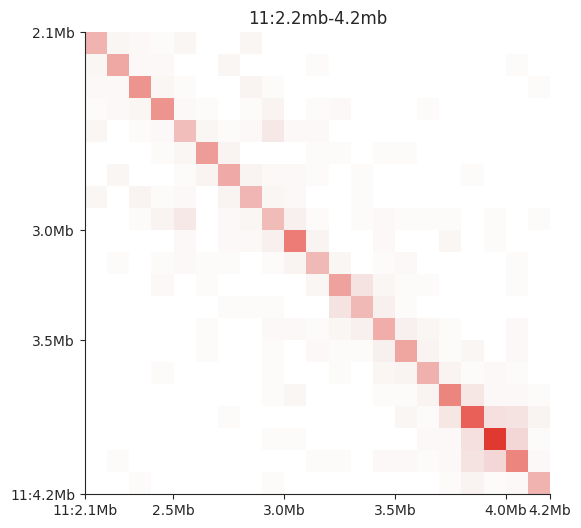

In [5]:
plt.figure(figsize=(6, 6))
hp = fancplot.SquareMatrixPlot(hic, colormap='white_red', matrix_norm=False, show_colorbar=False) 
hp.plot('11:2.2mb-4.2mb')
plt.title('11:2.2mb-4.2mb')
hp.show()

# Insulation

In [6]:
WINDOW_SIZES=[5000000, 1000000, 1500000, 2000000, 2500000, 3000000,3500000, 4000000]
REGION = '11:2.2mb-4.2mb'

In [7]:
insulation = fanc.InsulationScores.from_hic(hic,WINDOW_SIZES,file_name="Out/hic.insulation")

/home/patryk/.local/lib/python3.10/site-packages/fanc/architecture/domains.py:414: RuntimeWarning: divide by zero encountered in log2
  ins_matrix = np.log2(ins_matrix)


In [8]:
for window_size in WINDOW_SIZES:
    insulation.to_bed("Out/hic.insulation_"+str(window_size)+".bed", window_size)

/home/patryk/.local/lib/python3.10/site-packages/fanc/plotting/plotter.py:545: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels([human_format(tick) for tick in self.ax.get_yticks()])


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

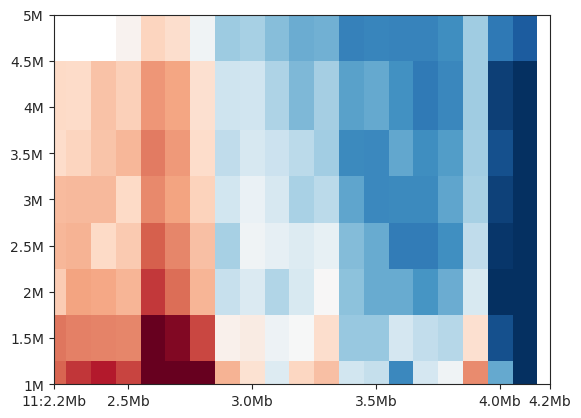

In [9]:
p = fancplot.GenomicVectorArrayPlot(insulation, colormap='RdBu_r', vmin=-1, vmax=1,
                                    genomic_format=True)
p.plot(REGION)

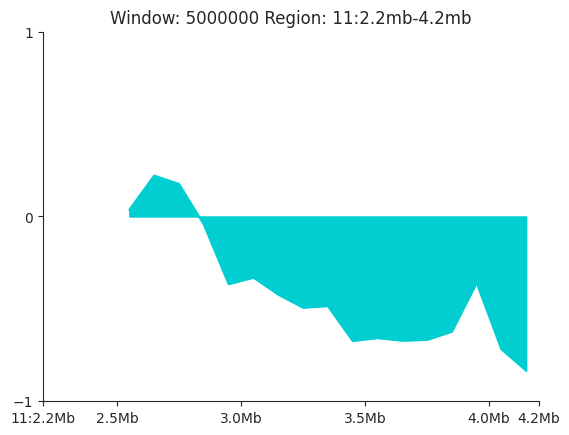

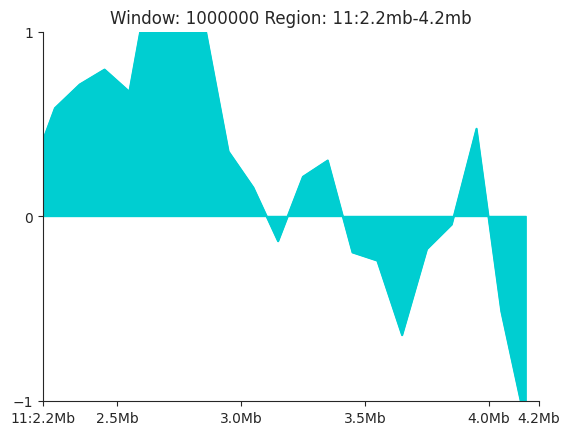

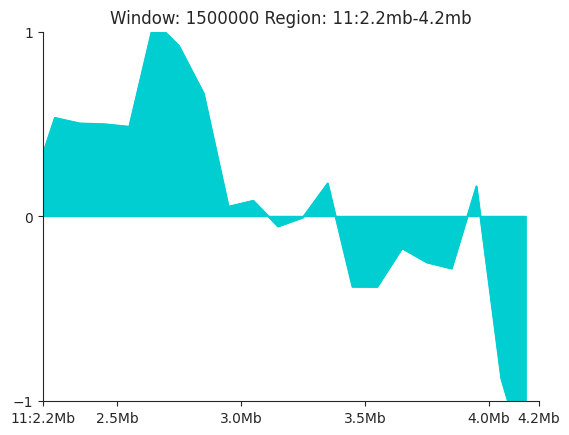

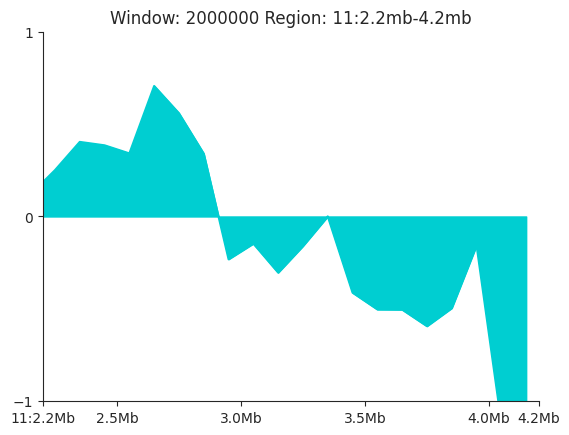

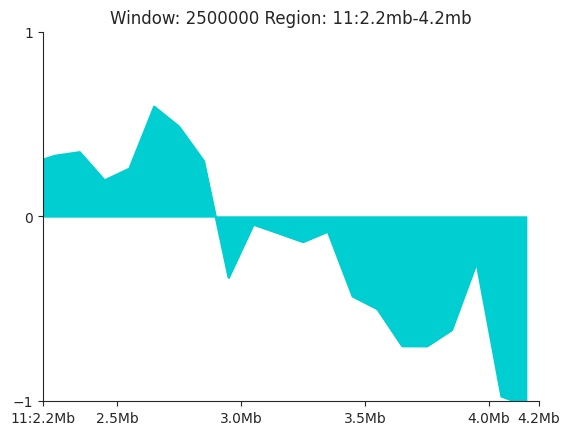

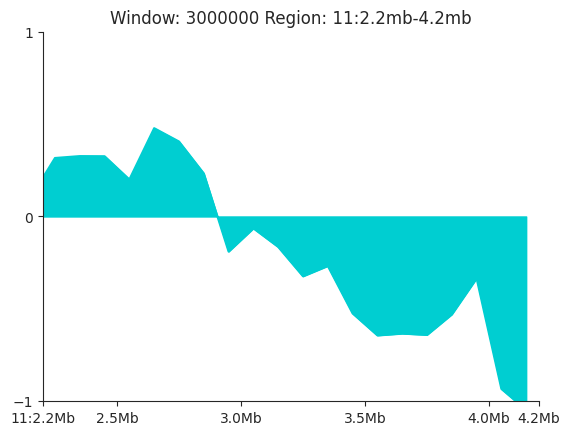

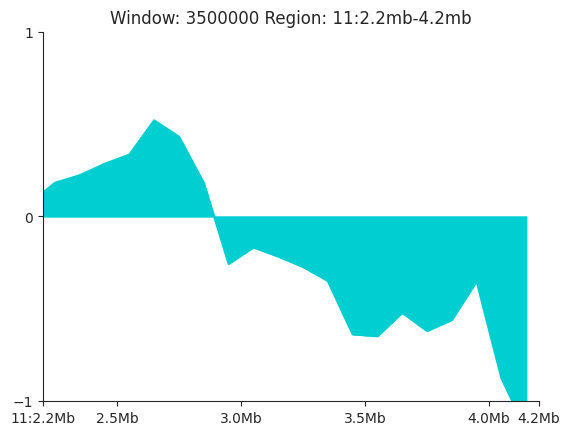

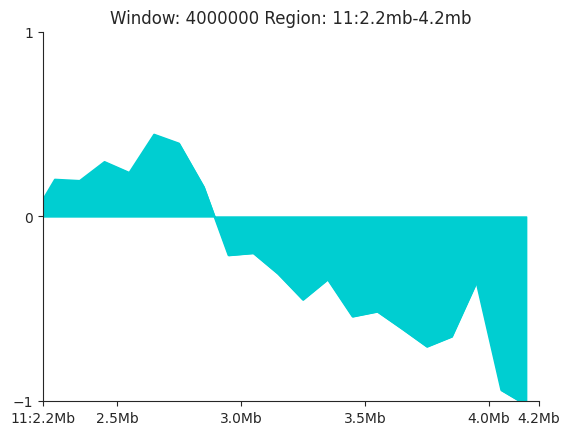

In [10]:
for window_size in WINDOW_SIZES:
    p = fancplot.LinePlot(insulation, ylim=(-1, 1), colors=['darkturquoise'], style="mid",
                      attribute="insulation_"+str(window_size))
    p.plot(REGION)
    plt.title("Window: "+str(window_size)+ " Region: " +REGION)
    plt.show()

/home/patryk/.local/lib/python3.10/site-packages/fanc/tools/matrix.py:79: UserWarning: Warning: converting a masked element to nan.
  delta[i] = np.ma.mean(x[down_slice] - x[i]) - np.ma.mean(x[up_slice] - x[i])


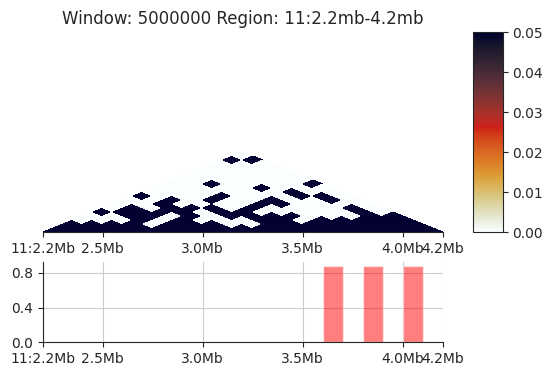

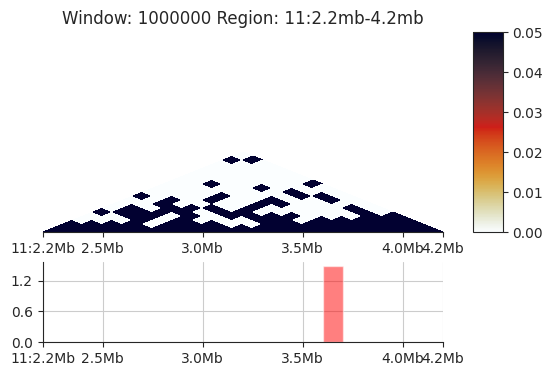

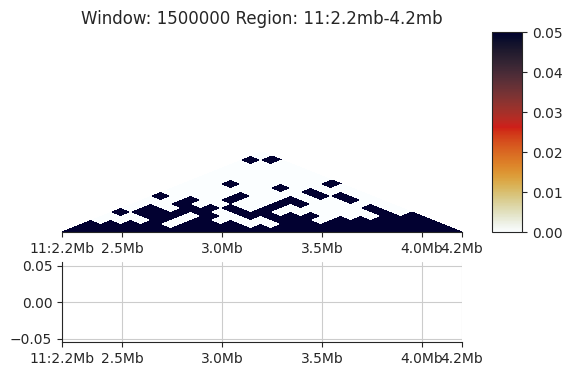

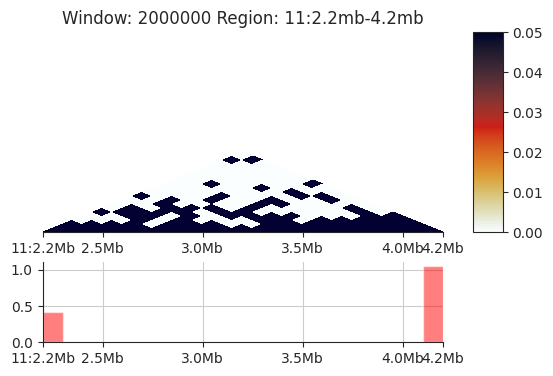

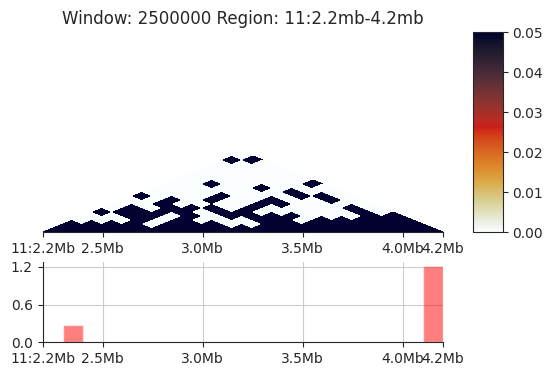

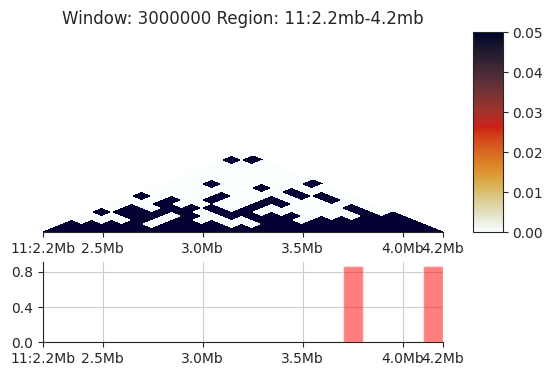

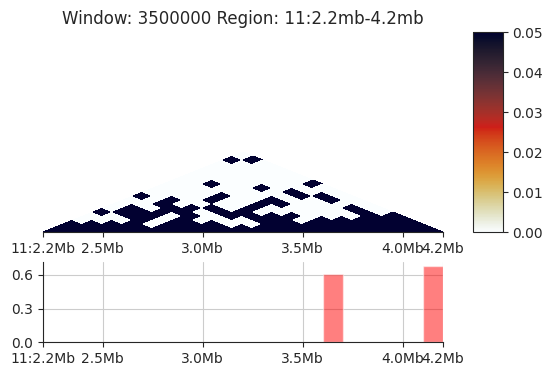

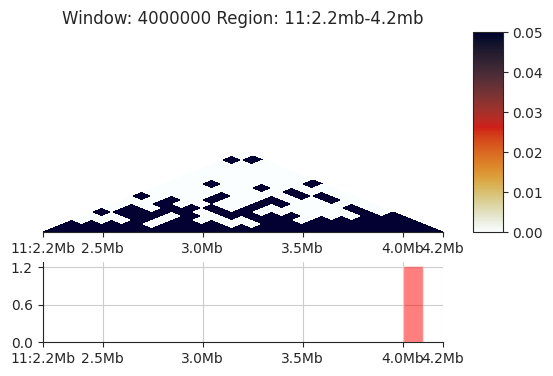

In [13]:
for window_size in WINDOW_SIZES:
    boundaries = fanc.Boundaries.from_insulation_score(insulation, window_size=window_size)
    ph = fancplot.TriangularMatrixPlot(hic, max_dist=5000000, vmin=0, vmax=0.05)
    pb = fancplot.BarPlot(boundaries)
    f = fancplot.GenomicFigure([ph, pb])
    fig, axes = f.plot(REGION)
    axes[0].set_title("Window: "+str(window_size)+" Region: "+REGION)
    plt.show()

# Directionality Index

In [23]:
directionality = fanc.DirectionalityIndexes.from_hic(hic,
                                                     [1000000, 1500000,
                                                      2000000, 2500000, 3000000,
                                                      3500000, 4000000],
                                                     file_name="Out/hic_100kb.di")

/home/patryk/.local/lib/python3.10/site-packages/fanc/plotting/plotter.py:545: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels([human_format(tick) for tick in self.ax.get_yticks()])


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

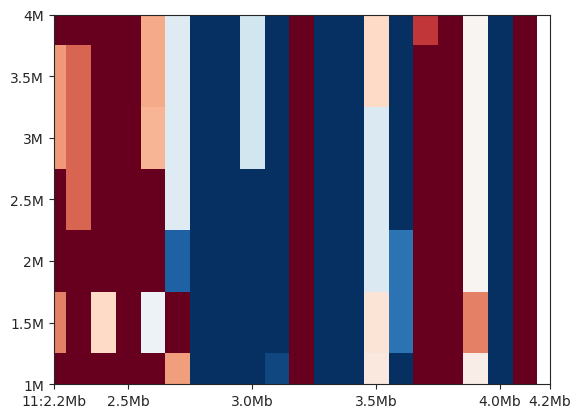

In [24]:
p = fancplot.GenomicVectorArrayPlot(directionality, colormap='RdBu_r', vmin=-0.1, vmax=0.1,
                                    genomic_format=True)
p.plot('11:2.2mb-4.2mb')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

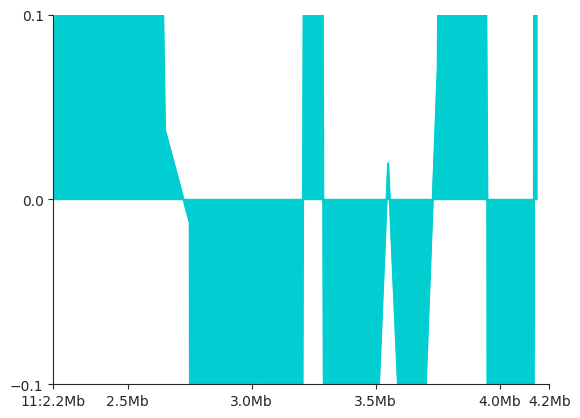

In [26]:
p = fancplot.LinePlot(directionality, ylim=(-0.1, 0.1), colors=['darkturquoise'], style="mid",
                      attribute="directionality_4000000")
p.plot('11:2.2mb-4.2mb')